In [1]:
import pandas as pd
import numpy as np

# Dados para o DataFrame
covid = {
    "peso": [30, 45, 37, 33, 25, 18, 14, 28, 12, 86, 73],
    "sexo": ["masculino", "feminino", "feminino", "feminino", "masculino", 
             "feminino", "feminino", "masculino", "masculino", "masculino", 
             "feminino"],
    "sedentario": ["sim", "nao", "nao", "sim", "nao", "nao", "sim", "sim", "sim", "sim", "nao"],
    "covid": ["sim", "nao", "sim", "sim", "nao", "nao", "nao", "sim", "sim", "sim", "nao"],
    "grave": ["sim", "nao", "sim", "sim", "nao", "nao", "sim", "sim", "sim", "sim", "nao"]
}

# Criação do DataFrame
df = pd.DataFrame(covid)

df



,peso,sexo,sedentario,covid,grave
0,30,masculino,sim,sim,sim
1,45,feminino,nao,nao,nao
2,37,feminino,nao,sim,sim
3,33,feminino,sim,sim,sim
4,25,masculino,nao,nao,nao
5,18,feminino,nao,nao,nao
6,14,feminino,sim,nao,sim
7,28,masculino,sim,sim,sim
8,12,masculino,sim,sim,sim
9,86,masculino,sim,sim,sim


In [2]:
from sklearn.tree import DecisionTreeClassifier

#transformando variaveis categoricas em numéricas
df['grave_numerica'] = df['grave'].map({'sim': 1, 'nao': 0})

X = df[['sexo']]
Y = df['grave_numerica']

X = pd.get_dummies(X, drop_first=True)

#treinar os dados
clf = DecisionTreeClassifier(criterion = 'gini')
clf.fit(X,Y)

indice_gini = clf.tree_.impurity

indice_gini

array([0.46280992, 0.5       , 0.32      ])

In [3]:
X = df[['sedentario']]
Y = df['grave_numerica']

X = pd.get_dummies(X, drop_first=True)

#treinar os dados
clf = DecisionTreeClassifier(criterion = 'gini')
clf.fit(X,Y)

indice_gini = clf.tree_.impurity

indice_gini

array([0.46280992, 0.32      , 0.        ])

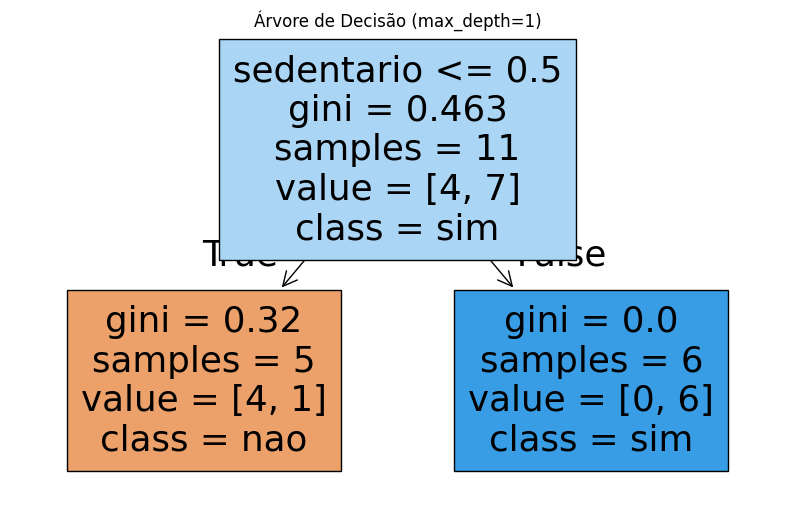

A variável escolhida para a raiz da árvore é: sedentario


In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt


# Definindo X e y
X = df[['sexo', 'sedentario']]
y = df['grave']  # Use a coluna 'grave' para y

# Aplicando OrdinalEncoder em X
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Aplicando LabelEncoder em y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Criando a árvore de decisão
clf = DecisionTreeClassifier(max_depth=1, random_state=0)
clf.fit(X_encoded, y_encoded)

# Plotando a árvore de decisão
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=encoder.get_feature_names_out(), class_names=label_encoder.classes_, filled=True)
plt.title("Árvore de Decisão (max_depth=1)")
plt.show()

# Variável escolhida para a raiz
raiz = clf.feature_importances_.argmax()
nome_variavel = encoder.get_feature_names_out()[raiz]

print("A variável escolhida para a raiz da árvore é:", nome_variavel)


[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.625, 0.5, '  False')]

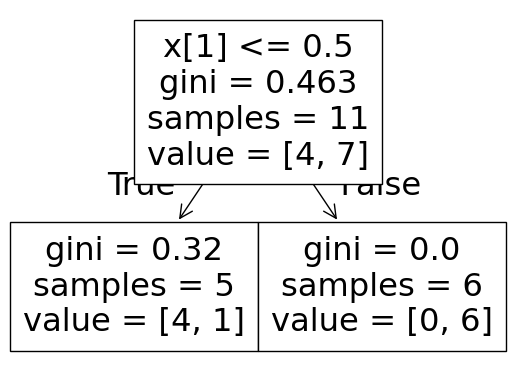

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt

# Definindo X e y
X = df[['sexo', 'sedentario']]
y = df['grave']  # Use a coluna 'grave' para y

# Encoding
X_encoder = OrdinalEncoder().fit_transform(X)
Y_encoder = LabelEncoder().fit_transform(y)

tree = DecisionTreeClassifier(max_depth=1, random_state=0).fit(X_encoder, Y_encoder)

plot_tree(tree)

In [10]:
df_tit = pd.read_csv('train.csv')

dados = df_tit.info

dados

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [14]:
valores = df_tit.dtypes

valores

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
segunda_classe = df_tit[df_tit['Pclass'] == 2]

maior_passagem = segunda_classe['Fare'].max()
maior_passagem

np.float64(73.5)

In [22]:
primeira_classe = df_tit[df_tit['Pclass'] == 1]

media_passagem = primeira_classe['Fare'].mean()
media_passagem

np.float64(84.1546875)

In [28]:
primeira_classe_total = df_tit[df_tit['Pclass'] == 1].shape[0]
segunda_classe_total = df_tit[df_tit['Pclass'] == 2].shape[0]
terceira_classe_total = df_tit[df_tit['Pclass'] == 3].shape[0]

print(f'Primeira classe: {primeira_classe_total}, Segunda classe: {segunda_classe_total}, Terceira classe: {terceira_classe_total}')


Primeira classe: 216, Segunda classe: 184, Terceira classe: 491


In [29]:
primeira_classe_total = len(df_tit[df_tit['Pclass'] == 1])
segunda_classe_total = len(df_tit[df_tit['Pclass'] == 2])
terceira_classe_total = len(df_tit[df_tit['Pclass'] == 3])

print(f'Primeira classe: {primeira_classe_total}, Segunda classe: {segunda_classe_total}, Terceira classe: {terceira_classe_total}')


Primeira classe: 216, Segunda classe: 184, Terceira classe: 491


In [33]:
total_passageiros = primeira_classe_total + segunda_classe_total + terceira_classe_total
total_passageiros

891

In [34]:
classe1 = primeira_classe_total/total_passageiros
classe1

0.24242424242424243

In [36]:
# Verificar quais colunas têm elementos nulos
colunas_nulas = df_tit.isnull().sum()

# Filtrar apenas as colunas com valores nulos
colunas_com_nulos = colunas_nulas[colunas_nulas > 0]

print(colunas_com_nulos)


Age         177
Cabin       687
Embarked      2
dtype: int64


In [38]:
colunas_nulas = df_tit.isnull().sum()
colunas_nulas

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
from sklearn.model_selection import train_test_split

X = df_tit.drop(columns=['Survived'])
y = df_tit['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

conjunto_treino = len(X_train)
conjunto_teste = len(X_test)

print(conjunto_teste, conjunto_treino)

268 623


In [86]:
valor_mais_frequente = X_train['Embarked'].mode()[0]

X_train['Embarked'].fillna(valor_mais_frequente, inplace = True)

proporcao_embarked = X_train['Embarked'].value_counts(normalize=True)

proporcao_embarked

C:\Users\mari_\AppData\Local\Temp\ipykernel_20628\3736754450.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Embarked'].fillna(valor_mais_frequente, inplace = True)


Embarked
S    0.735152
C    0.176565
Q    0.088283
Name: proportion, dtype: float64

In [87]:
homens = X_train[X_train['Sex'] == 'male']

idade_media_homens = homens['Age'].mean()

print(idade_media_homens)

30.331526479750778


In [88]:
mulheres = X_train[X_train['Sex'] == 'female']

idade_media_mulheres = mulheres['Age'].mean()

print(idade_media_mulheres)

27.31741573033708


In [89]:
mulheres_teste = X_test[X_test['Sex'] == 'female']

mulheres_teste['Age'].fillna(idade_media_mulheres, inplace=True)

idade_media_mulheres_teste = mulheres_teste['Age'].mean()

idade_media_mulheres_teste

C:\Users\mari_\AppData\Local\Temp\ipykernel_20628\3672248975.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mulheres_teste['Age'].fillna(idade_media_mulheres, inplace=True)
C:\Users\mari_\AppData\Local\Temp\ipykernel_20628\3672248975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mulheres_teste['Age'].fillna(idade_media_mulheres, inp

np.float64(28.86349983312938)

In [90]:
correlacao_pearson = X_train['Age'].corr(X_train['Fare'])

correlacao_pearson

np.float64(0.09409673412388482)

In [91]:
correlacao_pearson1 = X_train['SibSp'].corr(X_train['Parch'])

correlacao_pearson1

np.float64(0.44044234952676165)

In [92]:
correlacao_pearson2 = X_train['Pclass'].corr(X_train['Fare'])

correlacao_pearson2

np.float64(-0.5292075556520719)

In [93]:
correlacao_pearson3 = X_train['Pclass'].corr(X_train['SibSp'])

correlacao_pearson3

np.float64(0.09714608270672613)

In [94]:
X_train.drop(columns=['Cabin', 'Ticket', 'PassengerId', 'Name'], inplace=True)

In [95]:
X_train['Sex'] = X_train['Sex'].map({'male':0,'female':1})
X_test['Sex'] = X_test['Sex'].map({'male':0,'female':1})

mulher_treino = len(X_train[X_train['Sex'] == 1])
mulher_teste = len(X_test[X_test['Sex'] == 1])

print(mulher_treino, mulher_teste)

213 101


In [82]:
X_train['Embarked'] = X_train['Embarked'].map({'S':0,'C':1,'Q':2})

total_embarked = X_train['Embarked'].sum()

total_embarked

np.int64(220)

In [96]:
# Mapear os valores da coluna 'Embarked'
X_train['Embarked'] = X_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Somar todos os valores da coluna 'Embarked'
total_embarked = X_train['Embarked'].sum()

print(total_embarked)


220


In [97]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,0,4.0,0,2,81.8583,0
650,3,0,NaN,0,0,7.8958,0
172,3,1,1.0,1,1,11.1333,0
450,2,0,36.0,1,2,27.7500,0
314,2,0,43.0,1,1,26.2500,0


In [109]:
from sklearn.metrics import accuracy_score

arvore = DecisionTreeClassifier(max_depth=5, random_state=42)

arvore.fit(X_train, y_train)

predicao = arvore.predict(X_train)

acuracia = accuracy_score(y_train, predicao)

acuracia

0.85553772070626

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo de árvore de decisão
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)

# Ajustar o modelo aos dados de treino
modelo.fit(X_train, y_train)  # Assumindo que y_train é sua variável alvo

# Fazer previsões no conjunto de treino
predicoes_treino = modelo.predict(X_train)

# Calcular a acurácia
acuracia_treino = accuracy_score(y_train, predicoes_treino)

print(f'A acurácia aproximada no conjunto de treino é: {acuracia_treino:.2f}')


A acurácia aproximada no conjunto de treino é: 0.86


In [112]:
X_test.drop(columns=['Cabin', 'Ticket', 'PassengerId', 'Name'], inplace=True)

In [114]:
X_test['Embarked'] = X_train['Embarked'].map({'S':0,'C':1,'Q':2})

In [115]:
predicao = arvore.predict(X_test)

acuracia = accuracy_score(y_test, predicao)

acuracia

0.7686567164179104

In [116]:
arvore2 = DecisionTreeClassifier(max_depth= None, random_state=42)

arvore2.fit(X_train, y_train)

acuracia2 = accuracy_score(y_train, arvore2.predict(X_train))

acuracia2

0.9791332263242376

In [117]:
acuracia2 = accuracy_score(y_test, arvore2.predict(X_test))

acuracia2

0.7350746268656716